In [1]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


/home/arpitgupta/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/arpitgupta/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
train=pd.read_csv("all/train.csv")
test=pd.read_csv("all/test.csv")

In [3]:
train.columns


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [4]:
train.shape

(42000, 785)

In [5]:
test.shape

(28000, 784)

In [6]:
X = train.drop('label',1)
y = train.label

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42)
X_train.shape

(38640, 784)

In [8]:
from time import time
n_components = 60
t0 = time()
#pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
pca = PCA(svd_solver='randomized',n_components=n_components,whiten=True).fit(X_train/255.0)

print("done in %0.3fs" % (time() - t0))


done in 38.907s


In [9]:
t0 = time()
X_train_pca = pca.transform(X_train/255.0)
X_test_pca = pca.transform(X_test/255.0)
print("done in %0.3fs" % (time() - t0))

done in 1.439s


In [10]:
# X_train_pca.shape

In [11]:
###############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
##################classifiers-SVC##################################
# param_grid = {
#          'C': [ 1e5],
#           'gamma': [0.0001],
#           }
# # for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
# clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
#####################################################################
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
# print("Best estimator found by grid search:")
# print(clf.best_estimator_)

Fitting the classifier to the training set
done in 0.490s


In [12]:
###############################################################################
# Quantitative evaluation of the model quality on the test set

target_names = ['0','1','2','3','4','5','6','7','8','9']
print("Predicting the digits on the testing set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(accuracy_score(y_test, y_pred, normalize=True))
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(10)))

Predicting the digits on the testing set
done in 32.694s
0.955357142857
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       339
          1       0.91      1.00      0.95       376
          2       0.99      0.93      0.96       344
          3       0.95      0.95      0.95       421
          4       0.98      0.96      0.97       317
          5       0.95      0.95      0.95       275
          6       0.97      0.99      0.98       310
          7       0.95      0.95      0.95       347
          8       0.97      0.89      0.93       310
          9       0.94      0.94      0.94       321

avg / total       0.96      0.96      0.96      3360

[[336   0   0   0   1   0   2   0   0   0]
 [  0 376   0   0   0   0   0   0   0   0]
 [  6   8 320   1   1   0   0   7   0   1]
 [  1   4   2 400   0   4   0   5   3   2]
 [  0   1   0   0 304   0   2   0   0  10]
 [  0   0   0   8   0 261   2   0   3   1]
 [  3   0   0   0   0   0 306  

In [13]:
submission_1 = pd.read_csv("all/sample_submission.csv")
submission_1.head(5)

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [14]:

orig_test_y = clf.predict(pca.transform(test/255.0))
submission_1.Label = orig_test_y



In [15]:
submission_1.head(5)
# submission_1.columns

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [16]:
submission_1.to_csv('out1.csv',index=False)

In [17]:
import pickle
# save the classifier
with open('knn_classifier.pkl', 'wb') as fid:
    pickle.dump(clf, fid)    

# load it again
# with open('svc_classifier.pkl', 'rb') as fid:
#     clf_loaded = pickle.load(fid)

/home/arpitgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


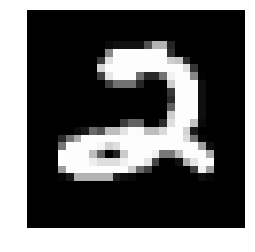

2


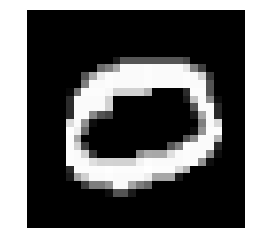

0


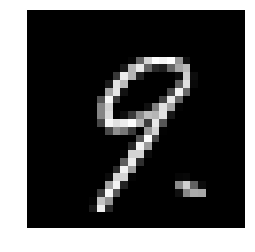

9


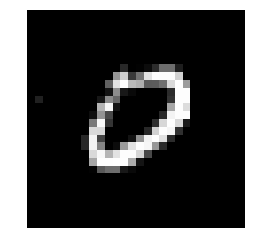

0


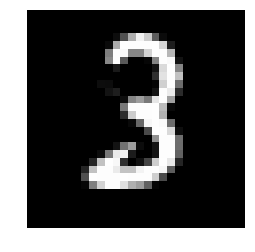

3


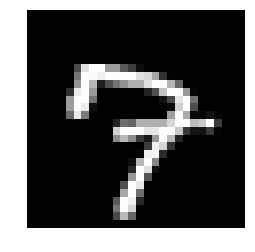

7


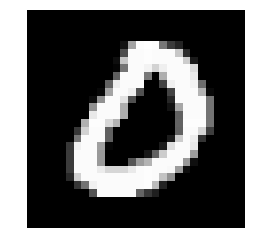

0


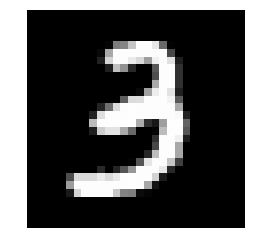

3


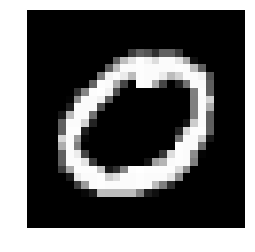

0


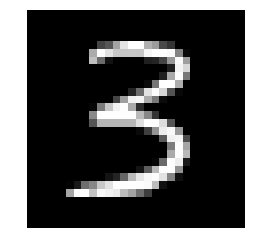

3


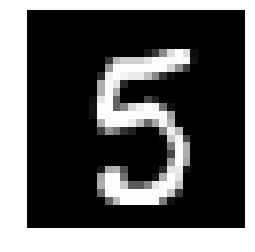

5


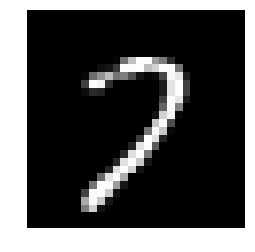

7


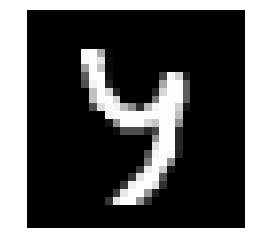

4


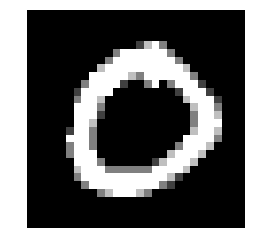

0


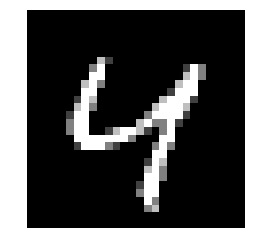

4


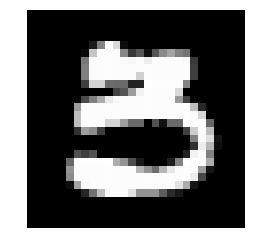

3


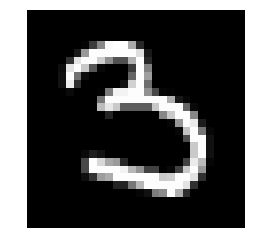

3


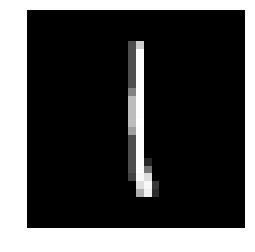

1


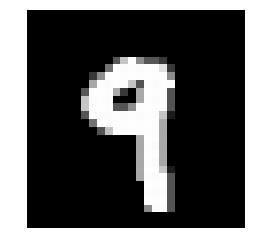

9


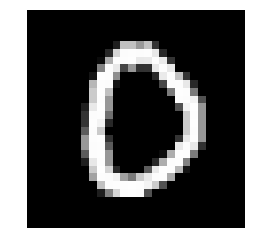

0


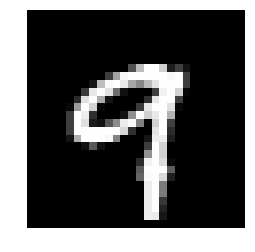

9


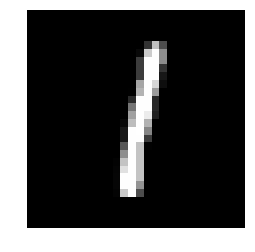

1


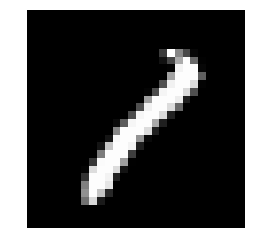

1


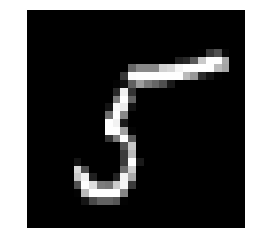

5


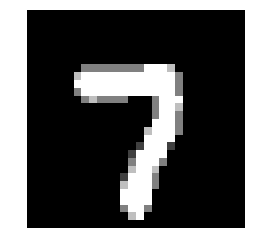

7


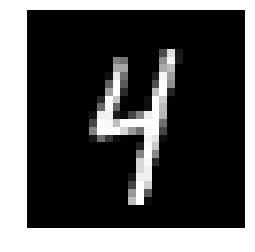

4


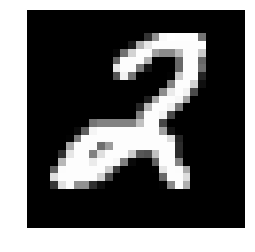

2


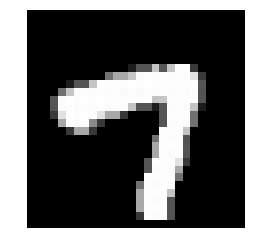

7


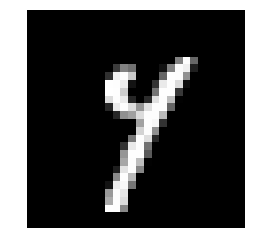

9


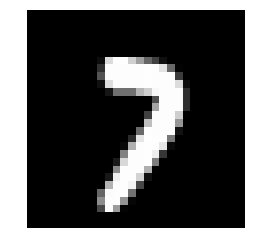

7


In [18]:
#viewing digit images in rows[0:30]--checking predicted result manually
for i in range(30):
    pixel_array = np.array(test.ix[i])
    pixel_matrix = np.reshape(pixel_array,(28,28))
    # pixel_matrix
    # Show image
    plt.imshow(pixel_matrix, cmap="gray"), plt.axis("off")
    plt.show()
    print(submission_1.loc[i].Label)
